In [1]:
import sys
sys.path.append("../py/")
sys.path.append("..")

from generation_tools import GeneralTools

import matplotlib.pyplot as plt

import numpy as np

#### Generating Mock Catalogs
This example shows the use of individual components of the mock generation tools. Each step is explained followed by the use of the specific function.
Here we use a configuration file which is similar to the original "../data/catget.cfg". The only difference is the pathing for the input files in the configuration file. In the future, we will try to remove the hardcoded paths from the configuration file.

In [2]:
gt = GeneralTools("../data/catgen_nb.cfg")

using predefined z bounds


##### Generating central and flat galaxies
The function (generate_galaxies) is used to generate the galaxies in the mock catalog. User can choose either to use a uniform distribution in r in [r_min, r_max] or use the distribution of r from the provided template. The example below show the latter use. For the former, one needs to provide the argument 'uniform=True' in the function.

The number of galaxies that will be generated is defined by $num\_obs$

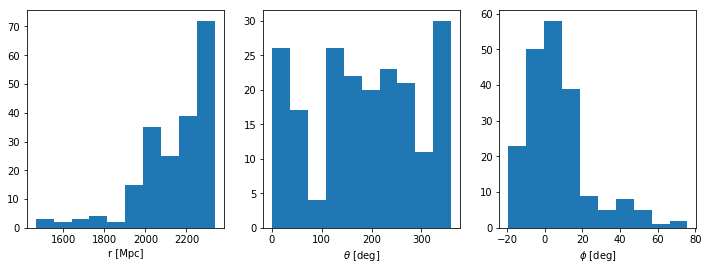

In [3]:
r, theta, phi = gt.generate_galaxies(num_obs=200)
plt.figure(1, figsize=(12,4))
plt.subplot(131)
plt.hist(r)
plt.xlabel('r [Mpc]')
plt.subplot(132)
plt.hist(theta)
plt.xlabel(r'$\theta$ [deg]')
plt.subplot(133)
plt.hist(phi)
plt.xlabel(r'$\phi$ [deg]')
plt.show()

##### Generating the rim galaxies
The rim galaxies are added to the mock using a gaussian distribution centered at the galaxies. The acceptance is also applied to the generated rim galaxies using the completeness provided.

The number of rim galaxies is read from the configuration file. Later, we will add the feature to define the number of rim galaxies through the function keeping the default to use the configuration file.

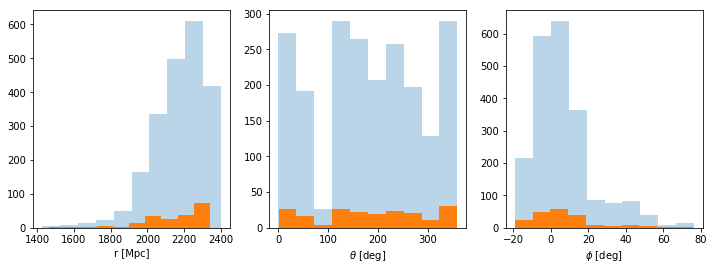

In [4]:
r_rim, theta_rim, phi_rim = gt.generate_rim(r, theta, phi)
plt.figure(1, figsize=(12,4))
plt.subplot(131)
plt.hist(r_rim, alpha=0.3)
plt.hist(r)
plt.xlabel("r [Mpc]")
plt.subplot(132)
plt.hist(theta_rim, alpha=0.3)
plt.hist(theta)
plt.xlabel(r'$\theta$ [deg]')
plt.subplot(133)
plt.hist(phi_rim, alpha=0.3)
plt.hist(phi)
plt.xlabel(r'$\phi$ [deg]')
plt.show()

#### Generating the clumps
The clumps that mimick the clumping due to dark matter is introduced via $f(r)=A\left(r_0/r\right)^\gamma$ where A is the normalization factor, $r_0$ and $\gamma$ are the input parameters.

For generating the clumps, the user has to provide the center galaxy coordinates. These coordinates are used in the code. Also in the code, flat galaxies are generated and used for injecting clumps. All the input parameters are defined in the configuration file.

In [5]:
center_clumps, flat_clumps, flats = gt.generate_clumps(r, theta, phi)

#### The results
The distributions and the positions of the galaxies are plotted here. As can be seen, the acceptance is applied during the generation.

The number of the clumps seem to be small but that is because they are very close to each other.

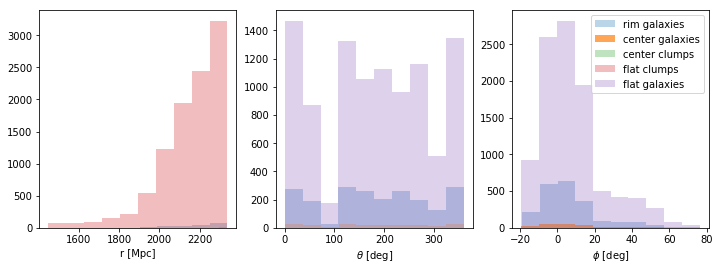

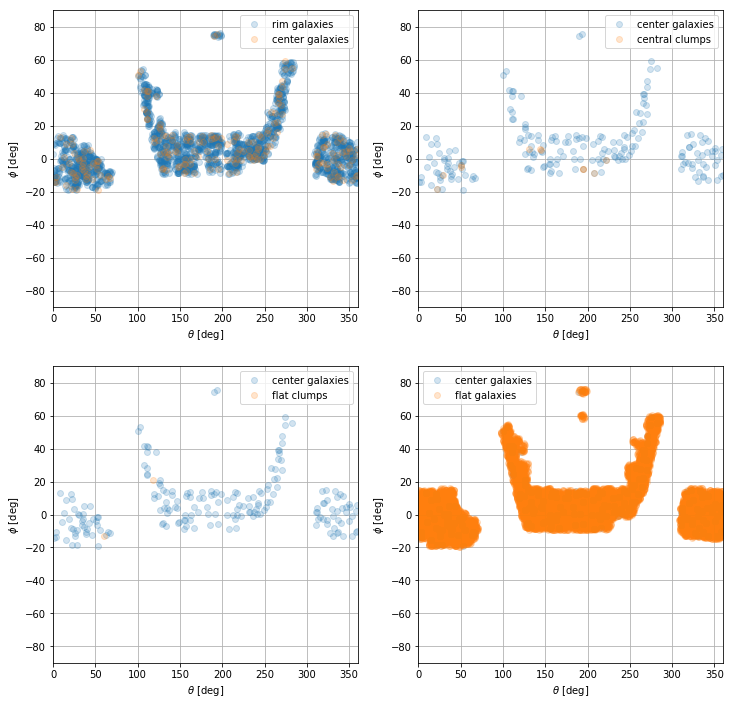

In [6]:
plt.figure(1, figsize=(12,4))
plt.subplot(131)
#plt.hist(r_rim, alpha=0.3)
plt.hist(r, alpha=0.3)
plt.hist(center_clumps[0], alpha=0.3)
plt.hist(flat_clumps[0], alpha=0.3)
plt.hist(flats[0], alpha=0.3)
plt.xlabel("r [Mpc]")
plt.subplot(132)
plt.hist(theta_rim, alpha=0.3)
plt.hist(theta, alpha=0.3)
plt.hist(center_clumps[1], alpha=0.3)
plt.hist(flat_clumps[1], alpha=0.3)
plt.hist(flats[1], alpha=0.3)
plt.xlabel(r'$\theta$ [deg]')
plt.subplot(133)
plt.hist(phi_rim, alpha=0.3, label="rim galaxies")
plt.hist(phi, alpha=0.7, label="center galaxies")
plt.hist(center_clumps[2], alpha=0.3, label="center clumps")
plt.hist(flat_clumps[2], alpha=0.3, label="flat clumps")
plt.hist(flats[2], alpha=0.3, label="flat galaxies")
plt.legend()
plt.xlabel(r'$\phi$ [deg]')
plt.savefig("distributions.pdf")

plt.figure(2, figsize=(12,12))
plt.subplot(221)
plt.plot(theta_rim, phi_rim, 'o', alpha=0.2, label="rim galaxies")
plt.plot(theta, phi, 'o', alpha=0.2, label="center galaxies")
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.xlabel(r"$\theta$ [deg]")
plt.ylabel(r"$\phi$ [deg]")
plt.legend()
plt.grid(True)
plt.subplot(222)
plt.plot(theta, phi, 'o', alpha=0.2, label="center galaxies")
plt.plot(center_clumps[1], center_clumps[2], 'o', alpha=0.2, label="central clumps")
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.xlabel(r"$\theta$ [deg]")
plt.ylabel(r"$\phi$ [deg]")
plt.legend()
plt.grid(True)
plt.subplot(223)
plt.plot(theta, phi, 'o', alpha=0.2, label="center galaxies")
plt.plot(flat_clumps[1], flat_clumps[2], 'o', alpha=0.2, label="flat clumps")
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.xlabel(r"$\theta$ [deg]")
plt.ylabel(r"$\phi$ [deg]")
plt.legend()
plt.grid(True)
plt.subplot(224)
plt.plot(theta, phi, 'o', alpha=0.2, label="center galaxies")
plt.plot(flats[1], flats[2], 'o', alpha=0.2, label="flat galaxies")
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.xlabel(r"$\theta$ [deg]")
plt.ylabel(r"$\phi$ [deg]")
plt.legend()
plt.grid(True)
plt.savefig("maps.pdf")
plt.show()